

## adversarial attack

In [0]:
img=np.expand_dims(img,axis=0)
img = tf.cast(img, tf.float32)


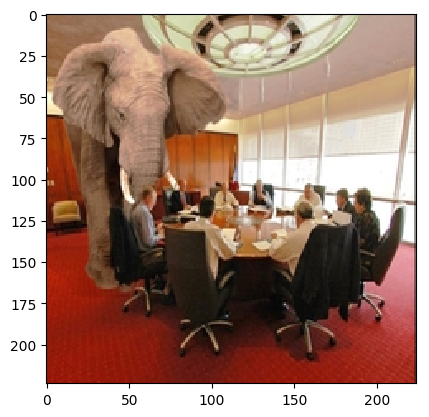

In [0]:
plt.imshow(np.array(undo_preprocess_input(img.numpy()[0]),dtype="uint8"))

In [0]:
pred=model_vgg.predict(img.numpy())
tf.keras.applications.vgg16.decode_predictions(pred)

[[('n03661043', 'library', 0.08129304),
  ('n04200800', 'shoe_shop', 0.059315663),
  ('n04548280', 'wall_clock', 0.048242312),
  ('n04081281', 'restaurant', 0.02514253),
  ('n04462240', 'toyshop', 0.025119366)]]

In [0]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def get_gradient_wrt_to_input(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model_vgg(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  #signed_grad = tf.sign(gradient)
  return gradient

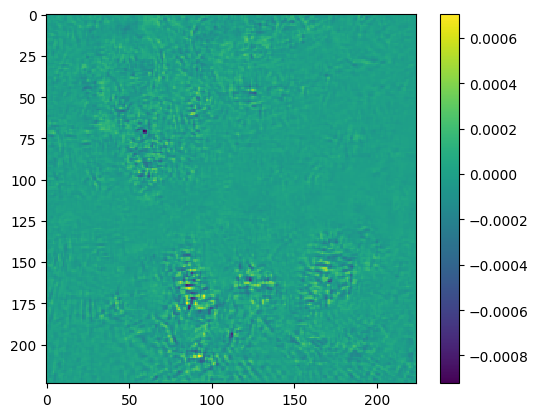

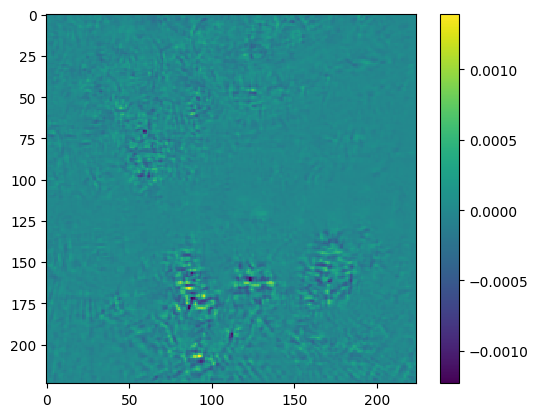

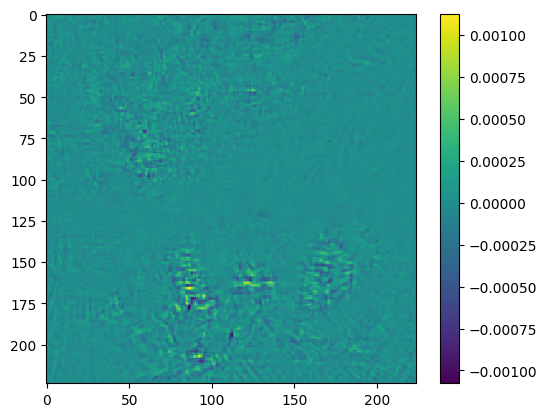

In [0]:
grads = get_gradient_wrt_to_input(img, tf.keras.utils.to_categorical(50,1000))
#plt.imshow(perturbations[0])
plt.imshow(grads[0,:,:,0])
plt.colorbar()
plt.show()
plt.imshow(grads[0,:,:,1])
plt.colorbar()
plt.show()
plt.imshow(grads[0,:,:,2])
plt.colorbar()
plt.show()

In [0]:
for i in range(0,10):
  img=img-5000*grads
  pred=model_vgg.predict(img)
  print(tf.keras.applications.vgg16.decode_predictions(pred))
  grads = get_gradient_wrt_to_input(img, tf.keras.utils.to_categorical(50,1000))
  #plt.imshow(image.numpy()[0,:,:,:])
  #plt.show()


[[('n01704323', 'triceratops', 0.08987711), ('n01817953', 'African_grey', 0.042651907), ('n04200800', 'shoe_shop', 0.029343903), ('n04462240', 'toyshop', 0.025609333), ('n04192698', 'shield', 0.025489185)]]
[[('n01698640', 'American_alligator', 0.791249), ('n01697457', 'African_crocodile', 0.081464514), ('n01667778', 'terrapin', 0.015677955), ('n02454379', 'armadillo', 0.014307855), ('n01689811', 'alligator_lizard', 0.013584375)]]
[[('n01698640', 'American_alligator', 0.89869684), ('n01697457', 'African_crocodile', 0.049193338), ('n02454379', 'armadillo', 0.008758589), ('n01689811', 'alligator_lizard', 0.005960264), ('n01667778', 'terrapin', 0.004960946)]]
[[('n01698640', 'American_alligator', 0.9241368), ('n01697457', 'African_crocodile', 0.03854505), ('n02454379', 'armadillo', 0.007015332), ('n01689811', 'alligator_lizard', 0.004364019), ('n01667778', 'terrapin', 0.003129439)]]
[[('n01698640', 'American_alligator', 0.93780386), ('n01697457', 'African_crocodile', 0.032936953), ('n0245

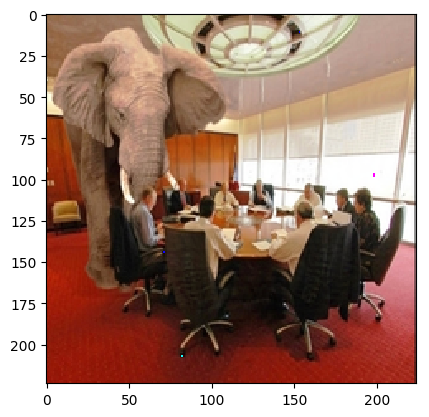

In [0]:
plt.imshow(np.array(undo_preprocess_input(img.numpy()[0]),dtype="uint8"))

In [0]:
pred=model_vgg.predict(img.numpy())
tf.keras.applications.vgg16.decode_predictions(pred)

[[('n01698640', 'American_alligator', 0.96478015),
  ('n01697457', 'African_crocodile', 0.020462159),
  ('n02454379', 'armadillo', 0.0033972876),
  ('n01689811', 'alligator_lizard', 0.0018623004),
  ('n01817953', 'African_grey', 0.0015167001)]]

In [0]:
print(np.argmax(pred))
print(np.max(pred))

50
0.96478015
